In [1]:
# import required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
proj_data = pd.read_csv('diabetes-data.csv')

In [3]:
# Assuming 'Outcome' is the target column (1=Diabetic, 0=Non-Diabetic)
X = proj_data.drop("Outcome", axis=1)
y = proj_data["Outcome"]

In [4]:
#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
#feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train Logistic Regression Model with validtion
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=cv, scoring="accuracy")
print(f"Cross-validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


#Train Final Model on Full Training Data

log_reg.fit(X_train_scaled, y_train)

Cross-validation Accuracy (5-fold): 0.7882 ± 0.0158


LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [8]:
#Evaluation

print("Model Performance on Test Data:\n")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Performance on Test Data:

Accuracy : 0.7142857142857143
Precision: 0.6086956521739131
Recall   : 0.5185185185185185
F1-score : 0.5599999999999999
ROC-AUC  : 0.8229629629629629

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



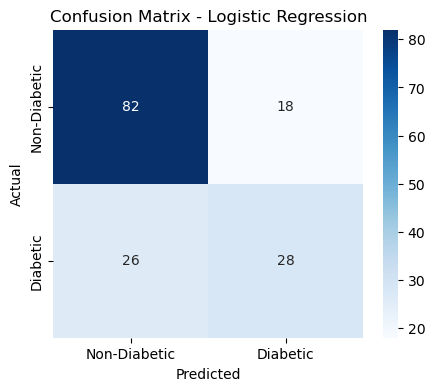

In [9]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Diabetic","Diabetic"],
            yticklabels=["Non-Diabetic","Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()